In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [27]:
data=pd.read_csv('Movie_Review.csv')


In [28]:
data['sentiment'].value_counts()

sentiment
pos    501
neg    501
Name: count, dtype: int64

In [29]:
data.dropna(inplace=True)


In [30]:
data

,text,sentiment
0,good movie,pos
1,Not a great movie,neg
2,"My daughter liked it but I was aghast, that a ...",neg
3,I... No words. No words can describe this. I w...,neg
4,this film is basically a poor take on the old ...,neg
...,...,...
997,"""Campfire Tales"" is basically made up of three...",pos
998,I just saw this film at the phoenix film festi...,pos
999,It's out of question that the real Anna Anders...,pos
1000,Michelle Pfeiffer stars as a mob widow who see...,pos


In [31]:
def clean_review(review):
    str=' '.join(word for word in  review.split() if word.lower() not in stopwords.words('english'))
    return str

In [32]:
data['text']=data['text'].apply(clean_review)

In [33]:
#Word Cloud : creating word based on repetetion -> size of word
from wordcloud import WordCloud

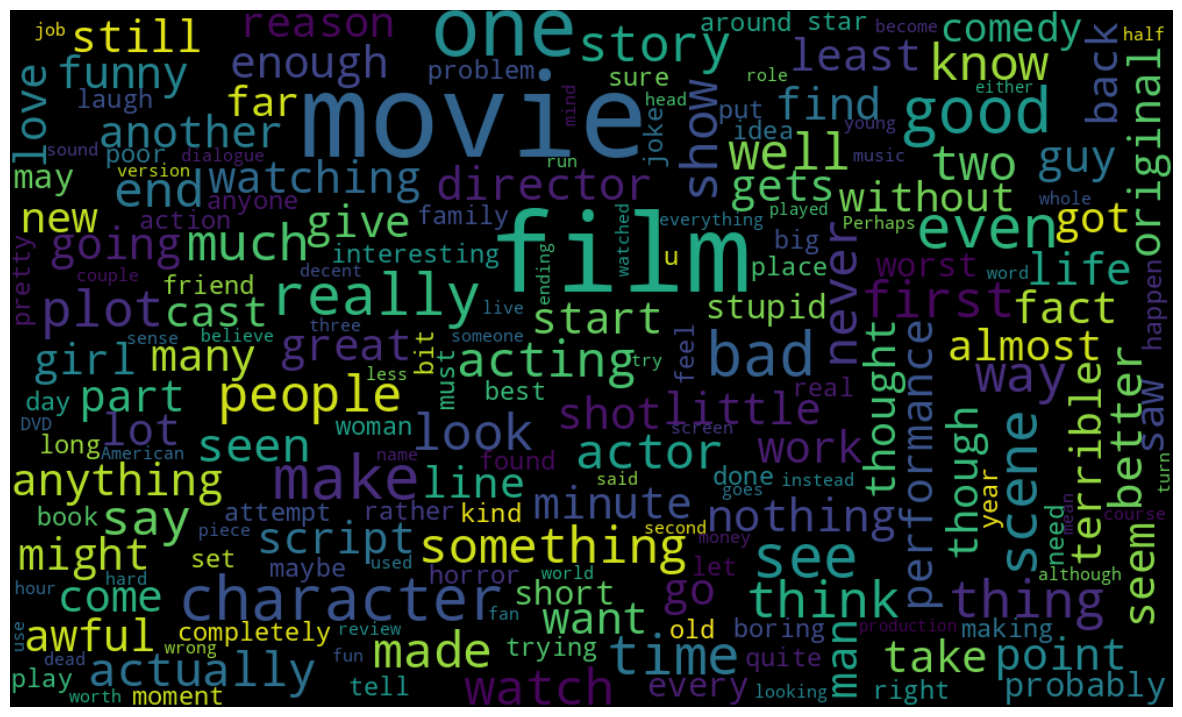

In [34]:
#Draw Wordcloud
reviews=''.join(word for word in data['text'][data['sentiment']=='neg'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

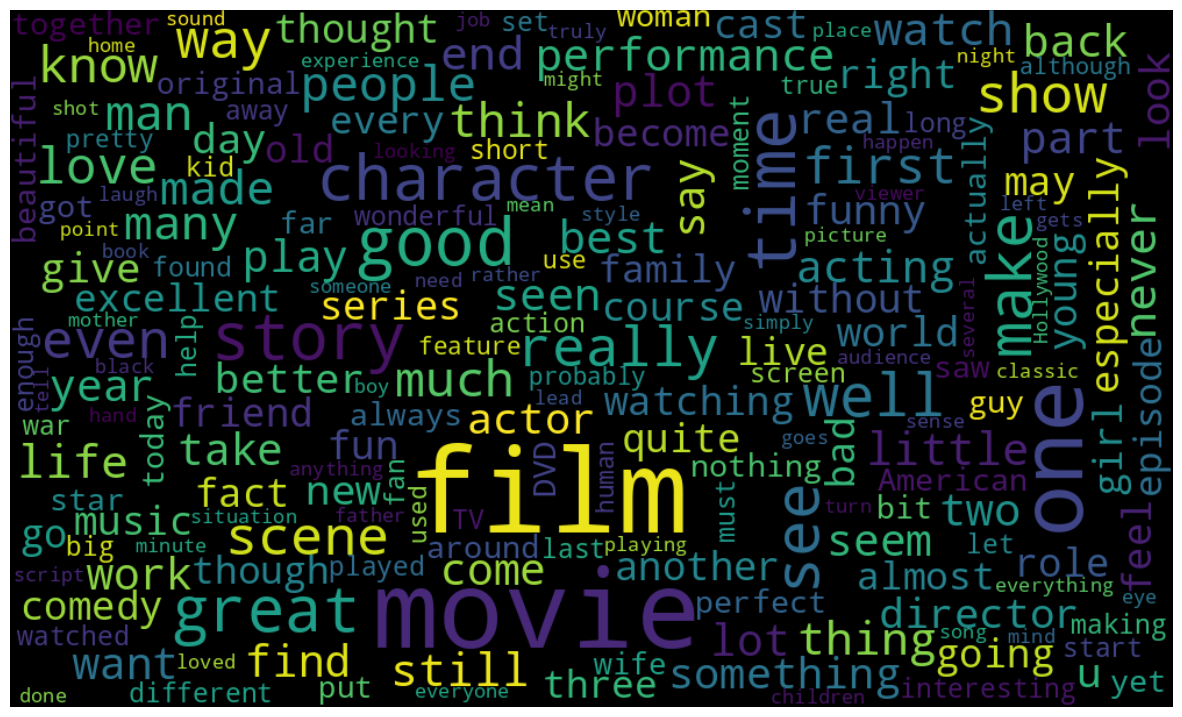

In [35]:
#Draw Wordcloud
reviews=''.join(word for word in data['text'][data['sentiment']=='pos'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
#Model using= Logistical regerssion : it needs a numerical data,to feed it to the model
# Now use : tfidvectoriser to conv to numerical data

from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)


In [37]:
reviews=cv.fit_transform(data['text']).toarray()

In [38]:
#Convert the neg and pos to 0 and 1
data['sentiment']=data['sentiment'].replace(['pos','neg'],[1,0])

/tmp/ipykernel_20468/1802716393.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['pos','neg'],[1,0])


In [39]:
data

,text,sentiment
0,good movie,1
1,great movie,0
2,"daughter liked aghast, character movie smokes....",0
3,I... words. words describe this. try sake brav...,0
4,film basically poor take old urban legend baby...,0
...,...,...
997,"""Campfire Tales"" basically made three spooky s...",1
998,saw film phoenix film festival today loved it....,1
999,question real Anna Anderson Princess Anastasia...,1
1000,Michelle Pfeiffer stars mob widow seeks normal...,1


In [40]:
data['sentiment'].value_counts()

sentiment
1    501
0    501
Name: count, dtype: int64

#Creating Model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
reviews_train,reviews_test,sent_train,sent_test=train_test_split(reviews,data['sentiment'],test_size=0.2)

In [45]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [46]:
 #Now predict with the model
predict=model.predict(reviews_test)

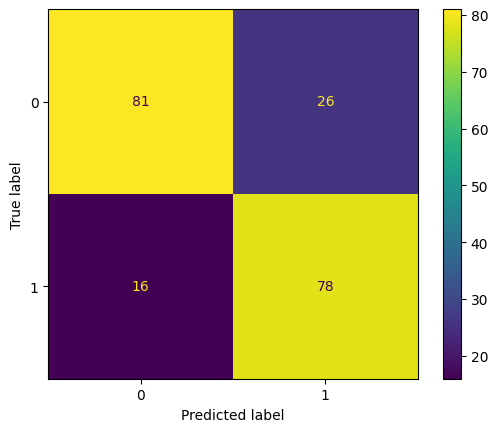

In [47]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [48]:
#Export Model for creating web Application
import pickle as pk


In [49]:
pk.dump(model,open('model.pk1','wb'))

In [50]:
pk.dump(cv,open('scaler.pk1','wb'))